# neuralthreads
[medium](https://neuralthreads.medium.com/i-was-not-satisfied-by-any-deep-learning-tutorials-online-37c5e9f4bea1)

## Chapter 2 — Optimizers

Adamax — Extension to Adam based on infinity norm


### 2.8 What is Adamax?

> First post (own_tutorial_1.ipynb).

> Fourth post (own_tutorial_4.ipynb).

> Eighth post (own_tutorial_8.ipynb).

> Previous post (own_tutorial_11.ipynb).

In this method, we don’t directly have a second moment, but we have a weight that uses the maximum of previous weights and the current absolute value of gradients.

Like Adam, we will include correction bias in the learning rate calling it ‘learning rate hat’.

In [1]:
%%latex
\begin{gather*}
    \widehat{learning\_rate} = \frac{learning\_rate}{1 - \beta_{1}^{i+1}}\\
    \\
    \text{Where beta1 or $\beta$ is the decay rate for the first moment and 'i' is the iteration loop index starting from 0.}\\
    \text{And, we calculate update as follow:}\\
    \\
    update = - \widehat{learning\_rate} * \frac{moment}{weight + epsilon}


\end{gather*}

<IPython.core.display.Latex object>

This post is divided into 3 sections.

1. Adamax in 1 variable
2. Adamax animation for 1 variable
3. Adamax in multi-variable function

## #1 Adamax in 1 variable

In this method, we calculate weight as the maximum of beta2 times past weight and the gradient.

Adamax algorithm in simple language is as follows:

> Step 1 - Set starting point and learning rate

> Step 2 - initiate

>               beta1 = 0.9
>               beta2 = 0.999
>               moment = 0
>               *weight = 0*
>               epsilon = 10**-8

> Step 3 - Initiate loop

>          Step 3.1 - calculate learning rate hat as stated above

>          Step 3.2 - calculate moment = beta1 * moment + (1 - beta1) * gradient

>          Step 3.4 - calculate weight = maximum(beta2 * weight, absolute(gradient))

>          Step 3.5 - calculate update as stated above

>          Step 3.6 - add update to point

First, let us define the function and its derivative and we start from x = -1

In [2]:
%%latex
\begin{gather*}
    y = f(x) = x - x^{3} \\
    \frac{dy}{dx} = f'(x) = 1 - 3x^{2} \\  
\end{gather*}

<IPython.core.display.Latex object>

In [3]:
import numpy as np
np.random.seed(42)

def f(x):                           # function definition                        
    return x - x**3

def fdash(x):                       # function derivative definition ## gradient
    return 1 - 3*(x**2)

And now Adamax

In [4]:
point = -1                                # step 1
learning_rate = 0.01

beta1 = 0.9                               # step 2
beta2 = 0.999
epsilon = 10**-8
moment = 0
weight = 0

for i in range(1000):                     # step 3
    learning_rate_hat = learning_rate / (1 - beta1**(i + 1))   # step 3.1
                                        
    moment = beta1 * moment + (1 - beta1) * fdash(point)  # step 3.2

    weight = np.maximum(beta2 * weight, abs(fdash(point)))              # step 3.3
                               
    update = - learning_rate_hat * moment / (weight + epsilon)   # step 3.4
                                         
    point += update                       # step 3.5
    
point                                     # Minima


-0.577350269189625

And, we have successfully implemented Adamax in Python.

## #2 Adamax animation for better understanding

Everything thing is the same as what we did earlier for the animation of the previous 8 optimizers. We will create a list to store starting point and updated points in it and will use the iᵗʰ index value for iᵗʰ frame of the animation.

In [5]:
import matplotlib.pyplot as plt 
import matplotlib.animation as animation 
from matplotlib.animation import PillowWriter

point_adamax = [-1]                   # initiating list with
                                      # starting point in it
beta1 = 0.9                           # step 2
beta2 = 0.999
epsilon = 10**-8
moment = 0
weight = 0

for i in range(1000):                     # step 3
    learning_rate_hat = learning_rate / (1 - beta1**(i + 1))   # step 3.1
                                        
    moment = beta1 * moment + (1 - beta1) * fdash(point)  # step 3.2

    weight = np.maximum(beta2 * weight, abs(fdash(point)))              # step 3.3
                               
    update = - learning_rate_hat * moment / (weight + epsilon)   # step 3.4
                                         
    point += update                       # step 3.5

    point_adamax.append(point)          # adding updated point to the list
    
point     

-0.5773502691896257

We will do some settings for our graph for the animation. You can change them if you want something different.

Text(0.5, 1.0, 'Amsgrad, learning_rate = 0.01')

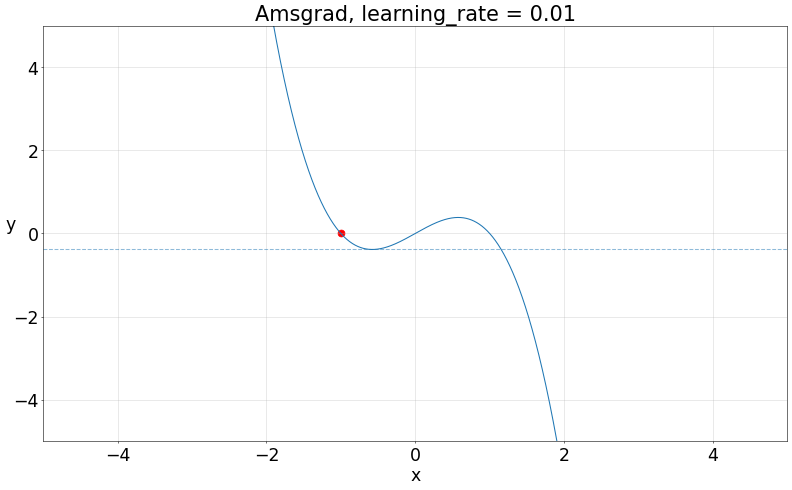

In [6]:
plt.rcParams.update({'font.size': 25})
fig = plt.figure(dpi = 50)

fig.set_figheight(10.80)
fig.set_figwidth(19.20)

x_ = np.linspace(-5, 5, 10000)
y_ = f(x_)

ax = plt.axes()

ax.plot(x_, y_)
ax.grid(alpha = 0.5)
ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5)
ax.set_xlabel('x')
ax.set_ylabel('y', rotation = 0)
ax.scatter(-1, f(-1), color = 'red', s=100)
ax.hlines(f(-0.5773502691896256), -5, 5, linestyles = 'dashed', alpha = 0.5)
ax.set_title('Amsgrad, learning_rate = 0.01')

Now we will animate the Amsgrad optimizer.

In [7]:
def animate(i):
    ax.clear()
    ax.plot(x_, y_)
    ax.grid(alpha = 0.5)
    ax.set_xlim(-5, 5)
    ax.set_ylim(-5, 5)
    ax.set_xlabel('x')
    ax.set_ylabel('y', rotation = 0)
    ax.hlines(f(-0.5773502691896256), -5, 5, linestyles = 'dashed', alpha = 0.5)
    ax.set_title('Adam, learning_rate = 0.01')
    
    ax.scatter(point_adamax[i], f(point_adamax[i]), color = 'red', s=100)

The last line in the code snippet above is using the iᵗʰ index value from the list for iᵗʰ frame in the animation.

In [8]:
anim = animation.FuncAnimation(fig, animate, frames = 200, interval = 10)
anim.save('2.8.SGD_Amsgrad.gif')

We are creating an animation that only has 200 frames and the gif is at 50 fps or frame interval is 20 ms.

It is to be noted that in less than 200 iterations we have reached the minima.

## #3 Amsgrad in multi-variable function (2 variables right now)

Everything is the same, we only have to initialize point (1, 0) and moment1 = 0 and moment2 = 0 and moment2_hat = 0 but with shape (2, 1) and replace fdash(point) with gradient(point).

But first, let us define the function, its partial derivatives and, gradient array

In [9]:
%%latex
\begin{gather*}
    f = 2x^{2} + 2xy + 2y^{2} - 6x \\
        \text{We know that Minima for this function is at (2, -1)} \\
        \text{and we will start from (1, 0)}\\
        \text{The partial derivatives are}\\
        \frac{\partial f}{\partial x} = 4x + 2y - 6 \\
        \frac{\partial f}{\partial y} = 2x + 4y \\
 \end{gather*}

<IPython.core.display.Latex object>

In [10]:
def f(x, y):                                    # function
    return 2*(x**2) + 2*x*y + 2*(y**2) - 6*x    # definition

def fdash_x(x, y):                              # partial derivative
    return 4*x + 2*y - 6                        # w.r.t x

def fdash_y(x, y):                              # partial derivative
    return 2*x + 4*y                            # w.r.t y

def gradient(point):                            # gradients
    return np.array([[     fdash_x(point[0][0], point[1][0])     ],
                     [     fdash_y(point[0][0], point[1][0])     ]], dtype = np.float64)    

Now the steps for Amsgrad in 2 variables are

In [11]:
point = np.array([[   1   ],                     # step 1
                  [   0   ]], dtype = np.float64)
learning_rate = 1

learning_rate = 0.01

beta1 = 0.9                                     # step 2
beta2 = 0.999
epsilon = 10**-8

moment1 = np.array([[   0   ],
                    [   0   ]], dtype = np.float64)
moment2 = np.array([[   0   ],
                    [   0   ]], dtype = np.float64)
moment2_hat = np.array([[   0   ],
                        [   0   ]], dtype = np.float64)

for i in range(1000):                           # step 3
    learning_rate_hat = learning_rate * np.sqrt(1 - beta2**(i + 1)) / (1 - beta1**(i + 1))  # step 3.1
    moment1 = beta1 * moment1 + (1 - beta1) * gradient(point)  # step 3.2
    
    moment2 = beta2 * moment2 + (1 - beta2) * gradient(point)**2  # step 3.3

    moment2_hat = np.maximum(moment2_hat, moment2)  # step 3.4
    
    update = - learning_rate_hat * moment1 / (moment2_hat**0.5 + epsilon)  # step 3.5
    point += update                             # step 3.6
point                                        # Minima

array([[ 2.],
       [-1.]])

I hope now you understand how Amsgrad works.